In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier #Using XGBOOST CLASSIFIER


In [4]:
# Loading the given datasets
train_data = pd.read_csv('/content/Assignment_Train.csv')
test_data = pd.read_csv('/content/Assignment_Test.csv')
feature_dict = pd.read_excel('/content/Assignment_FeatureDictionary.xlsx')

# Displays the first rows of the dataset
print(train_data.head())
print(test_data.head())
print(feature_dict.head())  # This will give an idea about the features and descriptions


   DEALER ID APPLICATION LOGIN DATE HDB BRANCH NAME HDB BRANCH STATE  \
0     106989             07/20/2022        DELHI-SF            DELHI   
1     108975             07/28/2022        PATNA-SF            BIHAR   
2     111004             07/15/2022   DARJEELING-SF      WEST BENGAL   
3     192020               07/04/22   SAHARANPUR-SF    UTTAR PRADESH   
4      55095             07/15/2022       MODASA-SF          GUJARAT   

  FIRST NAME MIDDLE NAME  LAST NAME      mobile AADHAR VERIFIED Cibil Score  \
0      SUNIL         NaN    CHANDER  9210574080              NO         726   
1      AMRIT         NaN      KUMAR  8877987018              NO         NaN   
2    ANIMESH         NaN      THAPA  8910862135              NO         737   
3     ADITYA         NaN      SINGH  9758428017              NO         713   
4     PARMAR  HARESHBHAI  AMRUTBHAI  9687028486              NO         669   

   ...  Phone Social Premium.shaadi Phone Social Premium.skype  \
0  ...                    

In [6]:
target_column = 'Application Status'
uid_column = 'UID'

In [7]:
# Preprocessing: Handling missing values, encoding categorical data and scaling numerical data
cat_cols = [col for col in train_data.columns if train_data[col].dtype == 'object' and col != target_column]
num_cols = [col for col in train_data.columns if train_data[col].dtype != 'object' and col != target_column]# Separating categorical and numerical features

In [8]:
# Handling missing categorical data
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
train_data[cat_cols] = ordinal_encoder.fit_transform(train_data[cat_cols])
test_data[cat_cols] = ordinal_encoder.transform(test_data[cat_cols])

In [9]:
# Handling missing numerical data by filling with median
train_data[num_cols] = train_data[num_cols].fillna(train_data[num_cols].median())
test_data[num_cols] = test_data[num_cols].fillna(test_data[num_cols].median())

In [10]:
# Feature scaling for numerical columns
scaler = StandardScaler()
train_data[num_cols] = scaler.fit_transform(train_data[num_cols])
test_data[num_cols] = scaler.transform(test_data[num_cols])

In [11]:
print(train_data.columns)
print(test_data.columns)

Index(['DEALER ID', 'APPLICATION LOGIN DATE', 'HDB BRANCH NAME',
       'HDB BRANCH STATE', 'FIRST NAME', 'MIDDLE NAME', 'LAST NAME', 'mobile',
       'AADHAR VERIFIED', 'Cibil Score', 'MOBILE VERIFICATION', 'DEALER NAME',
       'TOTAL ASSET COST', 'ASSET CTG', 'ASSET MODEL NO', 'APPLIED AMOUNT',
       'PRIMARY ASSET MAKE', 'Primary Asset Model No',
       'Personal Email Address', 'MARITAL STATUS', 'GENDER', 'DOB', 'AGE',
       'ADDRESS TYPE', 'EMPLOY CONSTITUTION', 'EMPLOYER NAME', 'EMPLOYER TYPE',
       'Pan Name', 'name', 'vpa', 'upi_name', 'Phone Social Premium.a23games',
       'Phone Social Premium.amazon', 'Phone Social Premium.byjus',
       'Phone Social Premium.flipkart', 'Phone Social Premium.housing',
       'Phone Social Premium.indiamart', 'Phone Social Premium.instagram',
       'Phone Social Premium.isWABusiness',
       'Phone Social Premium.jeevansaathi', 'Phone Social Premium.jiomart',
       'Phone Social Premium.microsoft', 'Phone Social Premium.my11',
       

In [12]:
X = train_data.drop(columns=[target_column])
y = train_data[target_column]

# For the test data, drop the 'UID' column as it's not needed for prediction
test_data_processed = test_data.drop(columns=['UID'])

In [13]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable 'Application Status' into 0 and 1
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

In [15]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train_encoded)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [16]:
# Evaluate on validation set
y_val_pred = xgb_model.predict(X_val)

# Use the encoded version of y_val for accuracy and report calculation
accuracy = accuracy_score(y_val_encoded, y_val_pred)
classification_report_xgb = classification_report(y_val_encoded, y_val_pred)
confusion_matrix_xgb = confusion_matrix(y_val_encoded, y_val_pred)

In [17]:
print(f"Validation Accuracy: {accuracy}")
print("Classification Report:\n", classification_report_xgb)
print("Confusion Matrix:\n", confusion_matrix_xgb)

Validation Accuracy: 0.894
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      1327
           1       0.85      0.84      0.84       673

    accuracy                           0.89      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.89      0.89      0.89      2000

Confusion Matrix:
 [[1226  101]
 [ 111  562]]


In [18]:
# Predicting the test set and decoding predictions
test_predictions = xgb_model.predict(test_data_processed)
test_predictions_decoded = label_encoder.inverse_transform(test_predictions)

In [19]:
# Save predictions to a CSV
output = pd.DataFrame({
    'UID': test_data['UID'],
    'Application_Status': test_predictions
})
output.to_csv('/content/predictions.csv', index=False)

<ipython-input-22-4883defef805>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Application Status', data=train_data, palette='viridis')


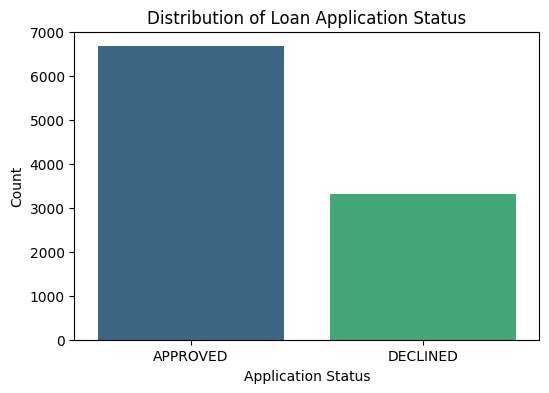

In [22]:
#Distribution of Loan Application Status (Accepted/Rejected)
plt.figure(figsize=(6, 4))
sns.countplot(x='Application Status', data=train_data, palette='viridis')
plt.title('Distribution of Loan Application Status')
plt.xlabel('Application Status')
plt.ylabel('Count')
plt.show()